# Final Report - Data Science 
## Bachelor in Computer Science / PUCPR

Professor Jean Paul Barddal

`Bruno Thuma` - `bruno.thuma@hotmail.com`

`Gustavo Hammerschmidt` - `gustavocrazy@yahoo.com`

`Leonardo Cleyton` - `leo_cleyton@hotmail.com`

`Lucas Lourenço Dall Agnol` - `lucas_ppl@live.com`

`Victor Marcel Vieira` - `e255270@outlook.com`

`2020`

# Import the libs you need

In [246]:
# Standard libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Statistics measurements.
from statsmodels.stats.outliers_influence import variance_inflation_factor # Statistics measurements.

#########################################################
#########################################################

# Drive Authentication libraries used to connect to the database:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Loading your data

Below, load the data using pandas and make all the necessary data cleansing so that all data types are correct for posterior analysis.

In [247]:
# LOAD YOUR DATA HERE:

#########################################################
#########################################################

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#########################################################
#########################################################

# LINKS TO THE DATABASE TRAINING, TESTING AND DESCRIPTION FILES:
CSV_TRAIN_FILE_LINK = "https://drive.google.com/file/d/1yyev_-wV1KCuflo71nsPXkrAQCPj2teB/view?usp=sharing"
id_train_set = CSV_TRAIN_FILE_LINK.split('/')[-2]

CSV_TEST_FILE_LINK = "https://drive.google.com/file/d/1TWbp7bYhU5BwjReZEIHt018BBeG043cC/view?usp=sharing"
id_test_set = CSV_TEST_FILE_LINK.split("/")[-2]

DESCRIPTION_FILE_LINK = "https://drive.google.com/file/d/1qblVwABXSrtSolBMAUkCucZ0i5UKyvak/view?usp=sharing"
id_description = DESCRIPTION_FILE_LINK.split("/")[-2]

#########################################################
#########################################################

# DOWNLOADING THE TRAIN FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded = drive.CreateFile({'id':id_train_set})
downloaded.GetContentFile('train_file.csv')  

df = pd.read_csv('train_file.csv', na_values=-9999.0, sep=',', error_bad_lines=False)
df["SAFRA"] = "TRAIN"

#########################################################
#########################################################

# DOWNLOADING THE TEST FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded_t = drive.CreateFile({'id':id_test_set})
downloaded_t.GetContentFile('test_file.csv')  

df_test = pd.read_csv('test_file.csv', na_values=-9999.0, sep=',', error_bad_lines=False)
df_test["SAFRA"] = "TEST"

#########################################################
#########################################################

# DOWNLOADING THE DESCRIPTION FILE ON MEMORY AND OPENING IT WITH PANDAS:
downloaded = drive.CreateFile({'id':id_description})
downloaded.GetContentFile('description_file.xlsx') 

df_description = pd.DataFrame(pd.read_excel("description_file.xlsx")) 

#########################################################
#########################################################

In [248]:
# CLEAN AND TREAT THE DATA HERE:

In [249]:
# SETTING ASSESSMENT FUNCTIONS TO CHECK THE DATABASE STATUS THROUGHOUT EXECUTION ON THE FLY:

#########################################################
#########################################################

# GRAB THE COLUMNS' NAME:
col_names = lambda x: "\n".join(["Coluna "+str(i)+": "+str(x.columns[i]) for i in range(0, len(x.columns))])

#########################################################
#########################################################

# NUMBER OF LINES IN DATAFRAME:
n_lines = lambda x: x.shape[0]

# NUMBER OF COLUMNS IN DATAFRAME:
n_columns = lambda x: x.shape[1]

#########################################################
#########################################################

# REMOVE COLUMNS FROM DATAFRAME:
remove_columns = lambda x, columns: x.drop(labels=columns, axis=1, inplace=True)

def remove_from_dataframe(df, columns):
    for i in [col_names(df).find(x) for x in columns]:
        if i == -1:
            return "Columns weren't found!" 
    remove_columns(df, columns)
    return "Columns removed!"

#########################################################
#########################################################

# SPECIFICATIONS ON COLUMNS WITH NON MULTIVALUES:
def specifications(df, multivalue=False):
    names, values_of_name = [x for x in df.columns], [df[x].unique() for x in df.columns]
    n_values = [ (str(x) if len(x) < 15 else 'multivalue') for x in values_of_name] 
    ret, ret2 = [ ("Name: "+names[x]+", values = "+n_values[x] if n_values[x]!='multivalue' else "") for x in range(0, len(names))], [ ("Name: "+names[x]+", values = "+n_values[x]) for x in range(0, len(names))]
    return ("\n".join(filter(lambda x : x != "", ret)) if not multivalue else "\n".join(ret2))

#########################################################
#########################################################

# Number of missing values by column:
missing_values = lambda x: pd.DataFrame(np.array([x[i].isna().sum() for i in df.columns]),index=df.columns).T

#########################################################
#########################################################

#Column name description:
description = lambda name: df_description[df_description["FINALNOME"] == str(name)].T.iloc[1, 0]

#########################################################
#########################################################


In [250]:
# REMOÇÃO DE COLUNAS:
remove_from_dataframe(df, {"ORIENTACAO_SEXUAL", "RELIGIAO"})
remove_from_dataframe(df_description, {'Unnamed: 2'})

# Remoção de valores descritivos iguais a na:
df_description = df_description[df_description['DESCRIÇÃO'].notna()]

In [251]:
# use as many code and text cells you wish

# Univariate data analysis

In this section, you should perform univariate data analysis on at least 20 variables. 

In the end, you should describe the main variables that are of your interest, and these should be accounted for in the next sections of the report.
The definition of each variable chosen should be clarified, so arbitrary selections are **not** accepted at this point.

For each variable plotted, make sure you determine the following:
1. The distribution of the data (gaussian, binomial, exponential, etc)
2. Skew
3. Kurtosis
4. Mean, standard deviation, and what they stand for in the context of the dataset

Regardless of the type of the variable being analyzed, make sure you plot it correctly. For instance, make sure scatterplots are not used for categorical data and so forth.

In [252]:
# place as many cells to plot the visualizations, 
# as well as to describe the main findings

In [253]:
# SETTING ASSESSMENT FUNCTIONS TO CHECK THE DATABASE THROUGHOUT EXECUTION ON THE FLY:

#########################################################
#########################################################

# GET REPARTITION OF DATAFRAME BY DIVISION AS MENCIONED ON DICTIONARY.XLSX:
# WARNING: 'SAFRA' COLUMN WAS NOT FOUND IN DATAFRAME, THEREFORE, WAS REMOVED. 
#    -> USE THE FOLLOWING CODE TO CHECK THE INEXISTANCE:  print(col_names(df).find("SAFRA"))
#    -> OUR TEAM HAS CHECKED THE DICTIONARY FOR EXPLANANTION: APPARENTLY, SAFRA REFERS TO THE SAMPLE SET IT WAS OBTAINED:
#    -> IN THIS CASE, MEANING THAT THE SET IS EITHER 'TRAIN' OR 'TEST'.
def splitted_df_block(df, block_index):
    names = dict()
    names["basicas"], names["renda"], names["empresarial"], names["familiar"], names["regional"] = 0,1,2,3,4
    indexes = [["HS_CPF","SAFRA","TEMPOCPF", "DISTCENTROCIDADE", "DISTZONARISCO","QTDENDERECO", "QTDEMAIL", "QTDCELULAR",
                "CELULARPROCON", "QTDFONEFIXO", "TELFIXOPROCON", "TARGET"],  # Colunas básicas;
                ["ESTIMATIVARENDA","QTDDECLARACAOISENTA","QTDDECLARACAO10","QTDDECLARACAOREST10","QTDDECLARACAOPAGAR10",
                  "RESTITUICAOAGENCIAALTARENDA","BOLSAFAMILIA","ANOSULTIMARESTITUICAO","ANOSULTIMADECLARACAO","ANOSULTIMADECLARACAOPAGAR"], # Renda;
                ["INDICEEMPREGO", "PORTEEMPREGADOR", "SOCIOEMPRESA", "FUNCIONARIOPUBLICO", "SEGMENTACAO",
                  "SEGMENTACAOCOBRANCA", "SEGMENTACAOECOM", "SEGMENTACAOFIN", "SEGMENTACAOTELECOM"], # Empresarial;
                ["QTDPESSOASCASA","MENORRENDACASA","MAIORRENDACASA","SOMARENDACASA","MEDIARENDACASA","MAIORIDADECASA",
                  "MENORIDADECASA","MEDIAIDADECASA","INDICMENORDEIDADE","COBRANCABAIXOCASA","COBRANCAMEDIOCASA","COBRANCAALTACASA",
                  "SEGMENTACAOFINBAIXACASA","SEGMENTACAOFINMEDIACASA","SEGMENTACAOALTACASA","BOLSAFAMILIACASA","FUNCIONARIOPUBLICOCASA"], #Familiar;
                [
                  "IDADEMEDIACEP","PERCENTMASCCEP","PERCENTFEMCEP","PERCENTANALFABETOCEP","PERCENTPRIMARIOCEP","PERCENTFUNDAMENTALCEP","PERCENTMEDIOCEP",
                  "PERCENTSUPERIORCEP","PERCENTMESTRADOCEP","PERCENTDOUTORADOCEP","PERCENTBOLSAFAMILIACEP","PERCENTFUNCIONARIOPUBLICOCEP","MEDIARENDACEP","PIBMUNICIPIO",
                  "QTDUTILITARIOMUNICIPIO","QTDAUTOMOVELMUNICIPIO","QTDCAMINHAOMUNICIPIO","QTDCAMINHONETEMUNICIPIO","QTDMOTOMUNICIPIO","PERCENTPOPZONAURBANA","IDHMUNICIPIO" ] # Regional.
    ]
    return df[indexes[block_index]] if not isinstance(block_index, str) else df[indexes[names[block_index.lower()]]]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
standard_plot_functions = [
                           
      ['distplot', lambda df, var, ignore: sns.distplot(df[var].dropna())],
      ['countplot', lambda df, var, ignore: sns.countplot(df[var].dropna())],
      ['boxplot', lambda df, var, var2: sns.boxplot(df[var].dropna()) if var2 == None else sns.boxplot(x=df[var].dropna(), y=df[var2].dropna())],
      ['violinplot', lambda df, var, var2: sns.violinplot(df[var].dropna()) if var2 == None else sns.violinplot(x=df[var].dropna(), y=df[var2].dropna())],
      ['hist', lambda df, var, ignore: df[var].hist()],
      ['pizza', lambda df, var, ignore: df[var].dropna().value_counts().plot(kind='pie', autopct='%1.1f%%')],
      ['distplot_kne', lambda df, var, ignore: sns.distplot(df[var].dropna(), kde=False, bins=10)],
      ['describe', lambda df, ignore, ignore2: df.describe()], 
      ['corr', lambda df, ignore, ignore2: df.corr()], 
      ['head', lambda df, var, limit: df[var].head(limit)],
      ['jointplot', lambda df, var, var2: sns.jointplot(df[var], df[var2], kind='kde')],
      ['scatterplot', lambda df, var, var2: sns.scatterplot(df[var], df[var2])],
      ['swarmplot',  lambda df, var, var2: sns.swarmplot(df[var], df[var2])],
      ['bubbleplot', lambda df, var, var2: plt.scatter(df[var], df[var2], s=np.random.rand(n_lines(df))*1000, alpha=0.5)],
      ['barplot', lambda df, var, var2: sns.barplot(df[var], df[var2], palette="Blues_d")]

]

#########################################################
#########################################################

# PLOT ANALYSIS FUNCTIONS:
additional_plot_functions = [
                             
    ['scatterplot_op', lambda df, var, var2, s_, alpha_: sns.scatterplot(df[var], df[var2], s=s_, alpha=alpha_)],
    ['stripplot', lambda df, var, var2, jitter_, size_: sns.stripplot(df[var], df[var2], jitter=jitter_, size=size_)],
    ['kdeplot', lambda df, var, var2, shade_, ignore: sns.kdeplot(df[var], df[var2], shade=shade_)]
    
]

#########################################################
#########################################################

# BRIDGE IN-BETWEEN NAME-FUNCTIONALITY CONNECTION:
types = dict()
for match in standard_plot_functions:
    types[match[0]] = match[1]

for match in additional_plot_functions:
    types[match[0]] = match[1]

#########################################################
#########################################################


# PLOT ANALYSIS FUNCTION:
# Easy caller to plot in one line:
def plot(df, type_, var1=None, var2=None, options=[], title=None, x_axis_name=None, y_axis_name=None, darkgrid=True, is_subplot=False,
         subplot_index=(), final_subplot=False):
    
    global types, SUBPLOT_COUNTER

    call_names = [i[0] for i in standard_plot_functions]
    call_names.append(i[0] for i in additional_plot_functions)
    
    if darkgrid:
        sns.set(style='darkgrid')
    
    if is_subplot:
        plt.subplot(*subplot_index)
    
    if type_ in ['scatterplot_op', 'stripplot', 'kdeplot']:
        types[type_](df, var1, var2, options[0], None) if type_ == 'kdeplot' else types[type_](df, var1, var2, options[0], options[1])

    elif type_ in ['describe', 'corr']:
        return types[type_](df, None, None)

    elif type_ in [i[0] for i in standard_plot_functions]:
        types[type_](df, var1, var2)

    elif type_ not in call_names:
        return 'Type not found!'

    plt.xlabel(x_axis_name if x_axis_name else "the X axis")
    plt.ylabel(y_axis_name if y_axis_name else "the Y axis")
    plt.title(title if title else '', loc="left")   

    if final_subplot:
        plt.show()
    else:
        plt.show()

#########################################################
#########################################################

# GET ONLY 'SET-VALUED' COLUMN NAMES:
non_multivalued_vars = lambda df: [x for x in df.columns if len(df[x].unique()) < 15]
df_snippet = lambda df: pd.DataFrame(np.array([str(df[x].unique()) if len(df[x].unique()) < 15 else 'multivalue' for x in df.columns]),index=df.columns).T

#########################################################
#########################################################


In [254]:
# if you realize you need to further clean your data here, there is no problem, 
# yet, make sure you are describing the entire process and the rationale 
# behind your choices here

# REPARTIONING OF THE DAFRAME BY BLOCKS RELATED TO DICTIONARY:
df_basicas, df_renda = splitted_df_block(df, "basicas"), splitted_df_block(df, "renda")
df_empresarial, df_familiar = splitted_df_block(df, "empresarial"), splitted_df_block(df, "familiar")
df_regional = splitted_df_block(df, "regional")


# CHECKING NUMBER OF NON-MULTIVALUED COLUMNS ON EACH PARTITION:
occurrences = lambda df, df_block: len([x for x in non_multivalued_vars(df) if x in df_block.columns])

print("Non-multivalued vars in df_basicas:", occurrences(df, df_basicas), 
      "\nNon-multivalued vars in df_renda:", occurrences(df, df_renda),
      "\nNon-multivalued vars in df_empresarial:", occurrences(df, df_empresarial),
      "\nNon-multivalued vars in df_familiar:", occurrences(df, df_familiar),
      "\nNon-multivalued vars in df_regional:", occurrences(df, df_regional))

Non-multivalued vars in df_basicas: 4 
Non-multivalued vars in df_renda: 2 
Non-multivalued vars in df_empresarial: 9 
Non-multivalued vars in df_familiar: 10 
Non-multivalued vars in df_regional: 1


In [255]:
df_snippet(df)

,HS_CPF,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,PORTEEMPREGADOR,SOCIOEMPRESA,FUNCIONARIOPUBLICO,SEGMENTACAO,SEGMENTACAOCOBRANCA,SEGMENTACAOECOM,SEGMENTACAOFIN,SEGMENTACAOTELECOM,QTDPESSOASCASA,MENORRENDACASA,MAIORRENDACASA,SOMARENDACASA,MEDIARENDACASA,MAIORIDADECASA,MENORIDADECASA,MEDIAIDADECASA,INDICMENORDEIDADE,COBRANCABAIXOCASA,COBRANCAMEDIOCASA,COBRANCAALTACASA,SEGMENTACAOFINBAIXACASA,SEGMENTACAOFINMEDIACASA,SEGMENTACAOALTACASA,BOLSAFAMILIACASA,FUNCIONARIOPUBLICOCASA,IDADEMEDIACEP,PERCENTMASCCEP,PERCENTFEMCEP,PERCENTANALFABETOCEP,PERCENTPRIMARIOCEP,PERCENTFUNDAMENTALCEP,PERCENTMEDIOCEP,PERCENTSUPERIORCEP,PERCENTMESTRADOCEP,PERCENTDOUTORADOCEP,PERCENTBOLSAFAMILIACEP,PERCENTFUNCIONARIOPUBLICOCEP,MEDIARENDACEP,PIBMUNICIPIO,QTDUTILITARIOMUNICIPIO,QTDAUTOMOVELMUNICIPIO,QTDCAMINHAOMUNICIPIO,QTDCAMINHONETEMUNICIPIO,QTDMOTOMUNICIPIO,PERCENTPOPZONAURBANA,IDHMUNICIPIO,ESTIMATIVARENDA,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET,SAFRA
0,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. 1. nan],multivalue,[ 0. 1. nan],[ 0. 4. 6. 1. 5. 3. 2. nan],[ 0. 1. 2. 3. 4. nan],[ 0. 1. nan],[ 0. 1. nan],[ 0. 1. 3. 2. 4. 5. nan],[ 0. 3. 1. 4. nan 2. 5.],[ 0. 1. nan 5. 2. 4. 3.],[ 0. 1. 2. nan 3. 4. 5.],[ 0. 3. 1. 2. 4. nan 5.],[ 2. nan 3. 4. 5. 6. 9. 7. 8. 10.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 0. nan 1.],[ 1. nan 0.],[ 0. nan 1.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. nan 1. 2. 3. 7. 5. 4. 6. 8.],multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,multivalue,[ 0. 1. nan],[ 0. 1. nan],multivalue,multivalue,multivalue,[0. 1.],['TRAIN']


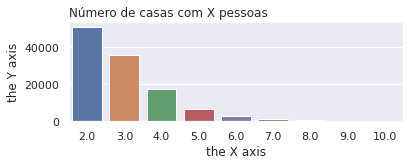

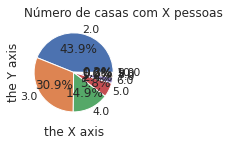

In [256]:
# Variável 1:
plot(df, 'countplot', 'QTDPESSOASCASA', title='Número de casas com X pessoas', is_subplot=True, subplot_index=(2,1,1))
plot(df, 'pizza', 'QTDPESSOASCASA', title='Número de casas com X pessoas', is_subplot=True, subplot_index=(2,1,2), final_subplot=True) 

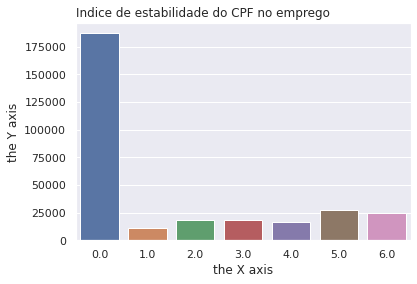

In [257]:
plot(df, 'countplot', 'INDICEEMPREGO', title=description('INDICEEMPREGO')) # Variável 2.

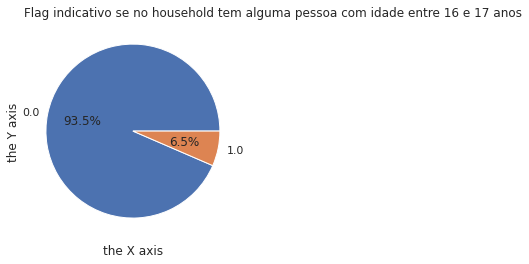

In [258]:
plot(df, 'pizza', 'INDICMENORDEIDADE', title=description('INDICMENORDEIDADE')) # Variável 3.

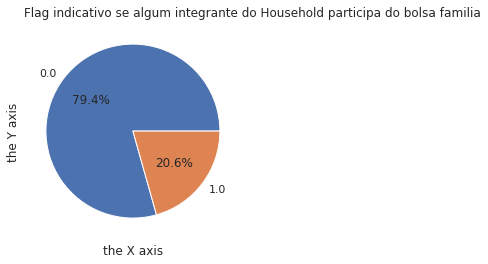

In [259]:
plot(df, 'pizza', 'BOLSAFAMILIACASA', title=description('BOLSAFAMILIACASA')) # Variável 4.

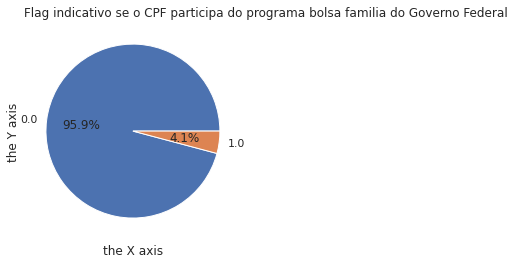

In [260]:
plot(df, 'pizza', 'BOLSAFAMILIA', title=description('BOLSAFAMILIA')) # Variável 5.

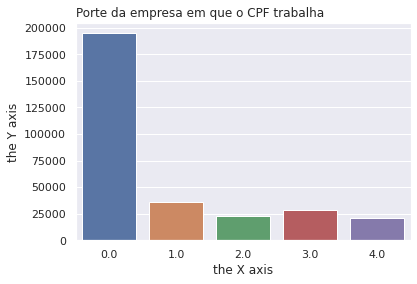

In [261]:
plot(df, 'countplot', 'PORTEEMPREGADOR', title=description('PORTEEMPREGADOR')) # Variável 6.

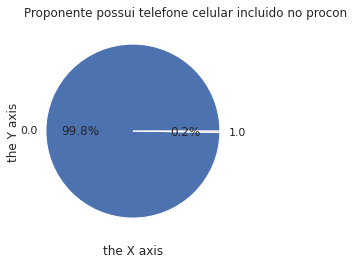

In [262]:
plot(df, 'pizza', 'CELULARPROCON', title=description('CELULARPROCON')) # Variável 7.

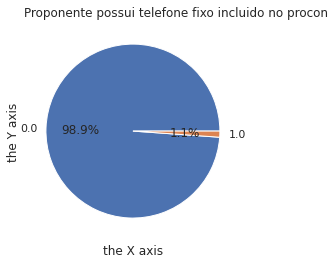

In [263]:
plot(df, 'pizza', 'TELFIXOPROCON', title=description('TELFIXOPROCON')) # Variável 8.

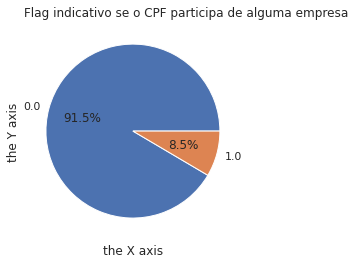

In [264]:
plot(df, 'pizza', 'SOCIOEMPRESA', title=description('SOCIOEMPRESA')) # Variável 9.

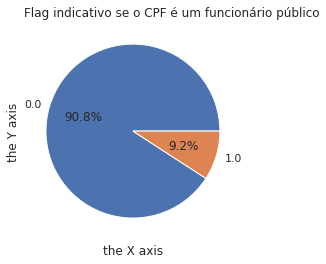

In [265]:
plot(df, 'pizza', 'FUNCIONARIOPUBLICO', title=description('FUNCIONARIOPUBLICO')) # Variável 10.

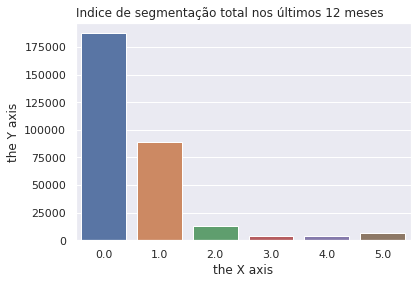

In [266]:
plot(df, 'countplot', 'SEGMENTACAO', title=description('SEGMENTACAO')) # Variável 11.

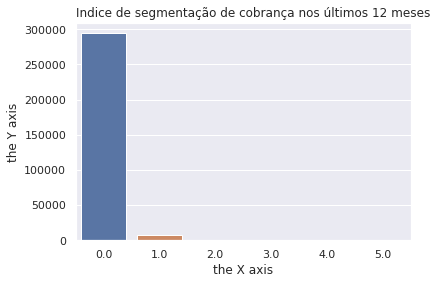

In [267]:
plot(df, 'countplot', 'SEGMENTACAOCOBRANCA', title=description('SEGMENTACAOCOBRANCA')) # Variável 12.

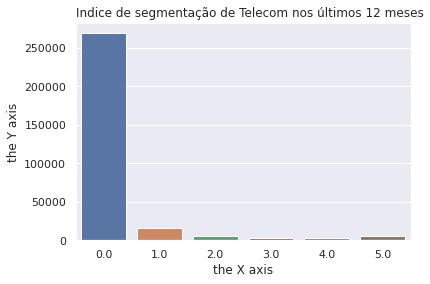

In [268]:
plot(df, 'countplot', 'SEGMENTACAOTELECOM', title=description('SEGMENTACAOTELECOM')) # Variável 13.

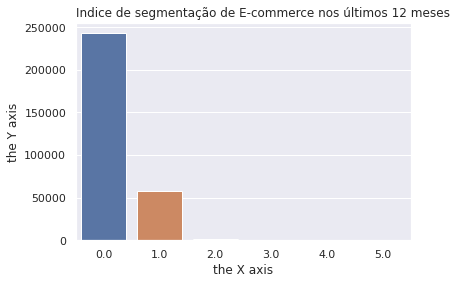

In [269]:
plot(df, 'countplot', 'SEGMENTACAOECOM', title=description('SEGMENTACAOECOM')) # Variável 14.

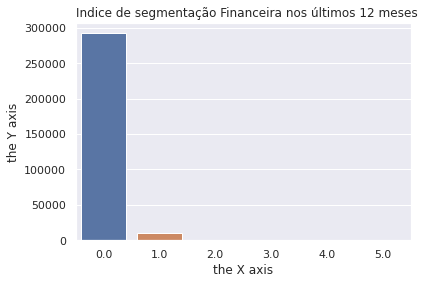

In [270]:
plot(df, 'countplot', 'SEGMENTACAOFIN', title=description('SEGMENTACAOFIN')) # Variável 15.

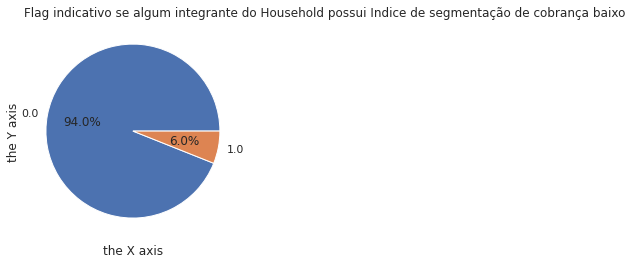

In [271]:
plot(df, 'pizza', 'COBRANCABAIXOCASA', title=description('COBRANCABAIXOCASA')) # Variável 16.

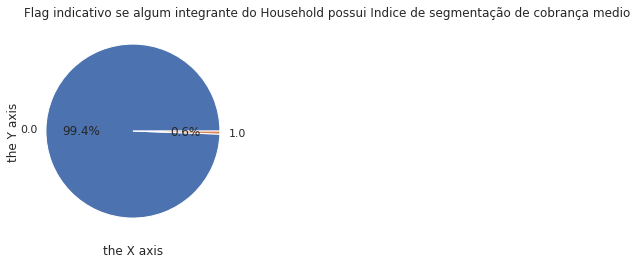

In [272]:
plot(df, 'pizza', 'COBRANCAMEDIOCASA', title=description('COBRANCAMEDIOCASA')) # Variável 17.

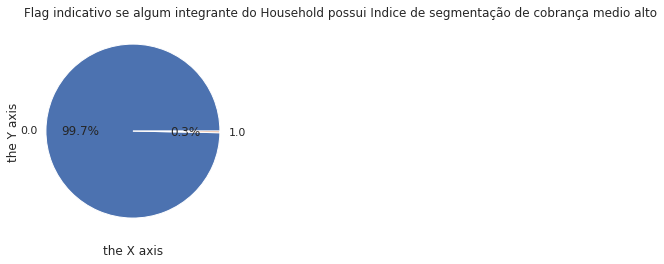

In [273]:
plot(df, 'pizza', 'COBRANCAALTACASA', title=description('COBRANCAALTACASA')) # Variável 18.

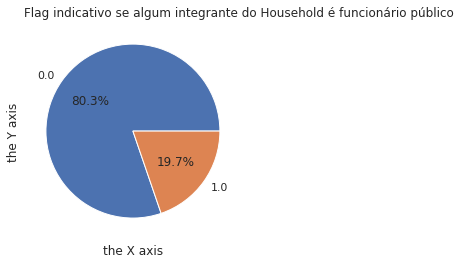

In [274]:
plot(df, 'pizza', 'FUNCIONARIOPUBLICOCASA', title=description('FUNCIONARIOPUBLICOCASA')) # Variável 19.

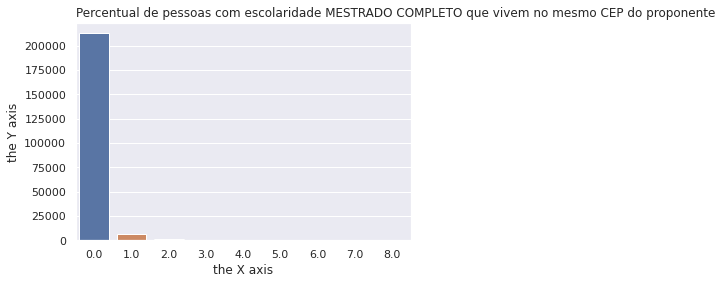

In [275]:
plot(df, 'countplot', 'PERCENTMESTRADOCEP', title=description('PERCENTMESTRADOCEP')) # Variável 20.

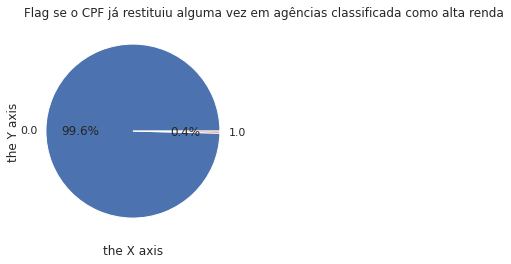

In [276]:
plot(df, 'pizza', 'RESTITUICAOAGENCIAALTARENDA', title=description('RESTITUICAOAGENCIAALTARENDA')) # Variável 21.

# Multivariate data analysis

In this section, you should plot at least 8 multivariate visualizations. The key here is to investigate underlying correlations and behaviors in the dataset.
Naturally, as visualizations are being created, we should end up with obvious results, yet, you should find at least **TWO** non-obvious behavior in data.

Please follow these steps for creating your visualizations:
1. State an hypothesis. The key here is to explain why you are choosing those specific variables together and what you are expecting to find.
2. Determine what kind of visualization is the most suited.
3. Report the findings and whether they corroborate or not the aforestated hypothesis.


### Hints

In this section, make sure you go beyond naive explorations. For instance, try PCA, t-SNE, and even other techniques we have not worked with during the lectures. The key here is to start to develop a critical mindset towards data analysis and our own work.

### Important

It is strictly forbidden to create multivariate visualizations using variables that were not used in the previous section (univariate analysis).

In [277]:
#plot(df, 'bubbleplot', 'QTDCELULAR', 'QTDPESSOASCASA',[],'Teste 1') # MOVE MULTIVALUE ANALYSIS

In [278]:
# again, feel free to place as many cells to plot the visualizations, 
# as well as describe to the main findings

In [279]:
# Vif não impacta o resultado da regressão logística.
# Mas, ao mesmo tempo remover va riávies com Vif alto, torna a equação mais simples.
def calc_vif(df):  
    df.fillna(df.mean(), inplace=True) # Imputação:  Substituir os valores faltantes pela média de cada coluna.
    vif = pd.DataFrame()
    vif['Variaveis'], vif['vif'] = df.columns, [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Final Plots

In this section, you need to enhance 3 multivariate visualizations that were presented in the previous section of the report.
The key here is to enhance these visualizations with the goal of presenting them for an audience that is not familiar with the dataset used or with data analysis.
**Therefore, make sure that its size, colors, textures, etc, are appropriate are convey the right information to the audience.**

For your final plots, make sure you follow these steps:
1. Present the plot
2. Provide a description of the visualization, including the main findings that we can extract from it


**Hint: take a look at the checklist also made available based on the work of Evergreen.**

In [280]:
# your code goes here

# Digest

In this section you should write down all the main findings of this exploratory data analysis. Furthermore, you should provide a reflection about your own work and effort during the module, highlighting what you believe you have done well and what you should have done differently. This digest should have at least 2500 characters (no spaces).

```
Add your text here.
```

# Machine Learning

In this section, you should test different machine learning approaches to **build** and **evaluate** your model.

**IMPORTANT: DO NOT FORGET TO REPORT YOUR PREDICTIONS FOR THE TEST DATA. YOU SHOULD BUILD AND EXPORT A FILE ACCORDING TO THE PROJECT DESCRIPTION WITH THE DEFAULTING PROBABILITIES!**

In [281]:
# use as many cells as you wish.

In [282]:
# but the sure that all cells are commented adequately!

# Future work

In this cell, please provide at least 3 different ideas that you would like to pursuit within this dataset. That may include, for example, the use of machine learning techniques towards a goal, or analyzing variables that you had no time to during this work. 
Please provide **details** on how you would tackle this problem and provide specifics on which techniques should be used for such purposes.
This section should contain, at least, 2500 characters (no spaces).

```
Add your text here.
```


# Final Steps


1. Save this report as a jupyter notebook (`.ipynb`)
2. Save a copy of this report as a PDF file (`.pdf`)
3. Copy the dataset
4. Zip it all together within a single file (`<your_name>.zip`)
5. Send it over using Blackboard.